In [2]:
#from google.colab import auth
#auth.authenticate_user()

In [ ]:
# first let's install the package from github
# and clone the repo for the example data
#!pip install git+https://github.com/Gibbsdavidl/gssnng
#!git clone https://github.com/Gibbsdavidl/gssnng

In [ ]:
#!pip3 install scanpy

In [3]:
#project = "cgc-05-0180"

In [1]:
!gsutil cp gs://cruk-adata-for-cellbrowser/Atlas_adatas_June2021/celltypes/Epithelial* .

Copying gs://cruk-adata-for-cellbrowser/Atlas_adatas_June2021/celltypes/Epithelial cells.h5ad...
\ [1 files][  2.3 GiB/  2.3 GiB]   24.0 MiB/s                                   
Operation completed over 1 objects/2.3 GiB.                                      


In [2]:
import scanpy as sc
from matplotlib.pyplot import rc_context
from gssnng import score_cells

In [6]:
%matplotlib inline

In [3]:
q = sc.read_h5ad('Epithelial cells.h5ad')

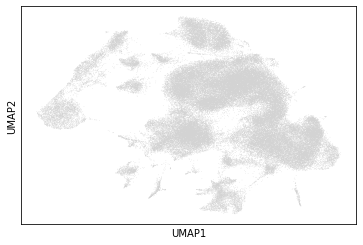

In [7]:
sc.pl.umap(q)

In [27]:
cellclusters = dict( 
  Squamous_epithelium_upper=['10'], 
  Squamous_epithelium_intermediate=['12',],
  Squamous_epithelium_basal=['14'],
  Gastric_mucous_secreting_cell=['3'],
  Cancer_cells=['5'],
  Simple_columnar_epithelial_cell=['2'],
  Chief_cells=['0'],
  Dysplasia=['11'],
  Metaplasia_Dysplasia_Mix=['26','7','1','25'],
  Metaplasia=['2'],
  Intestinal_metaplasia=['8'],
  Gastric_intestinal_metaplasia=['4','6','15'],
  Goblet_cells_1=['13'],
  Goblet_cells_2=['18'],
  Neuroendocrine_cell=['9'],
  Parietal_cell=['22']
)


cells = list(cellclusters.keys())


inv_cellclusters = {}
for k, v in cellclusters.items():
    for vi in v:
        inv_cellclusters[vi] = k
        
        
def labelCells(x, inv_cellclusters):
    if str(x) in inv_cellclusters:
        return(inv_cellclusters[str(x)])
    else:
        return('--')


celllabels = [labelCells(ci, inv_cellclusters) for ci in q.obs.leiden]
q.obs['FineGrainedCellTypes'] = celllabels



/home/daveg/.local/lib/python3.8/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'FineGrainedCellTypes' as categorical


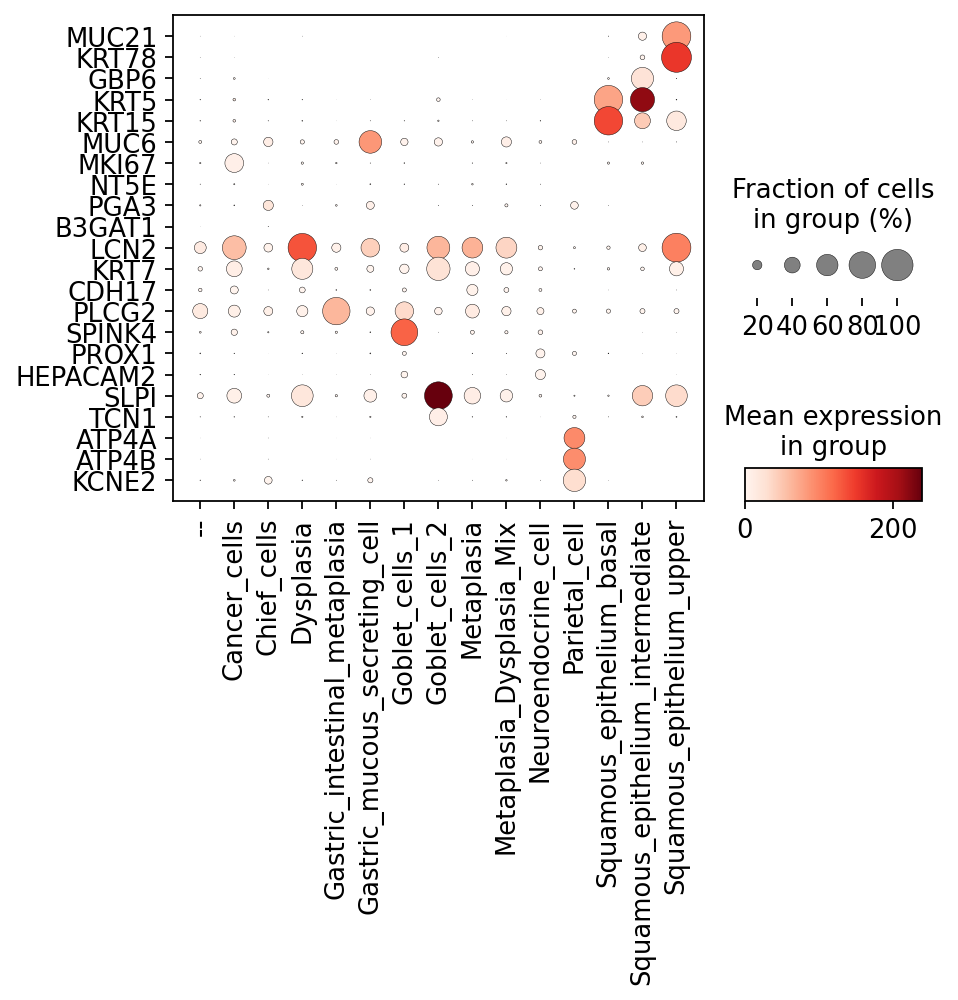

In [24]:
gene_names = ['MUC21', 
              'KRT78',
              'GBP6',
                'KRT5', 'KRT15',
                'MUC6',
                'MKI67',
                'NT5E',
                'PGA3', 'B3GAT1',
                'LCN2', 'KRT7',
                'CDH17',
                'PLCG2',
                'SPINK4',
                'PROX1', 'HEPACAM2',
                'SLPI', 'TCN1',
                'ATP4A', 'ATP4B', 'KCNE2']

dp = sc.pl.dotplot(adata=q,
                var_names=gene_names,
                groupby='FineGrainedCellTypes',
                dendrogram=False,
                swap_axes=True,
                figsize=(6,4),
                expression_cutoff=5,
                mean_only_expressed=False,
                #vmax=200
)

/home/daveg/.local/lib/python3.8/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'FineGrainedCellTypes' as categorical


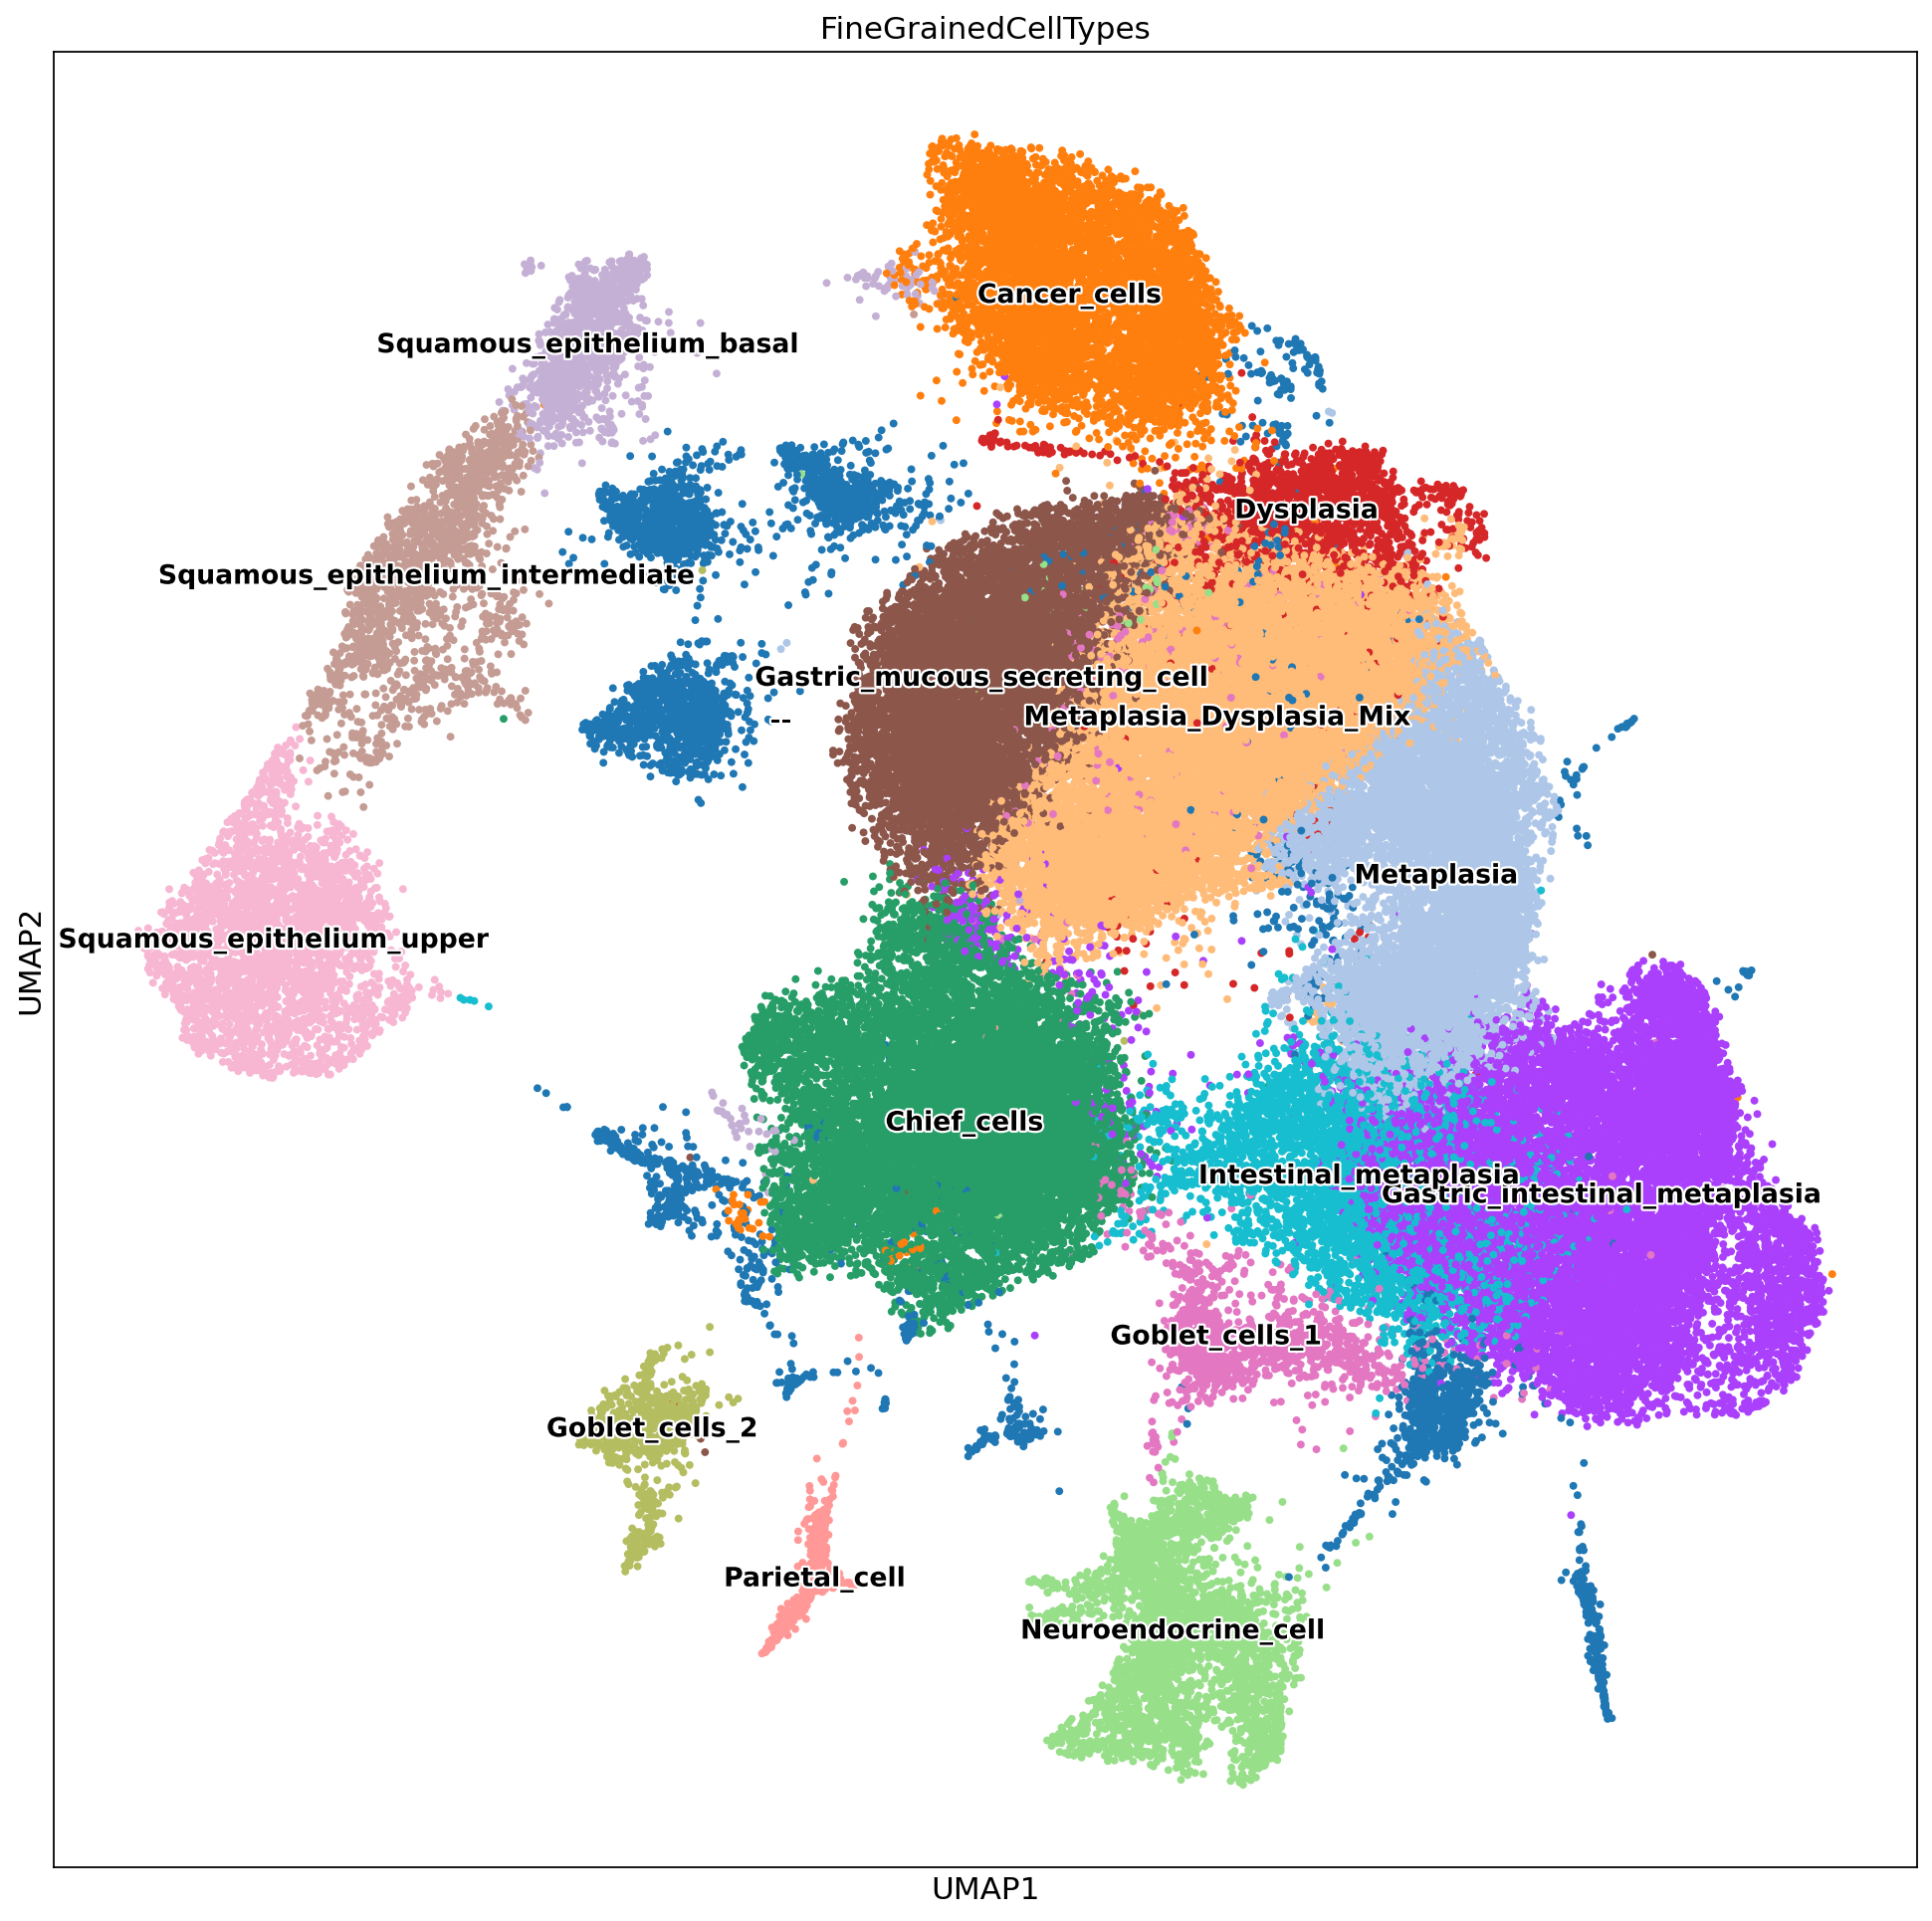

In [28]:
sc.set_figure_params(scanpy=True, figsize=(15,15))
                         
sc.pl.umap(q, color=['FineGrainedCellTypes'], size=50, legend_loc='on data',
               legend_fontsize=12, legend_fontoutline=2)

In [8]:
qsub = sc.pp.subsample(data=q, n_obs=10000, copy=True)

In [9]:
# recompute the nearest neighbor graph to give plenty of neighbors to each cell
sc.pp.neighbors(qsub, n_neighbors=43)


In [10]:

score_cells.with_gene_sets(
        adata=qsub,
        gene_set_file='hca_oesophagus_genesets.gmt',
        groupby="leiden",
        smooth_mode='connectivity',
        recompute_neighbors=0,
        score_method="rank_biased_overlap",
        method_params={'rbo_depth':50},
        samp_neighbors=37,
        ranked=True,
        cores=6
    )


running 3
running 5
running 6
running 1
running 4
running 25
running 8
running 0
running 21
running 17
running 20
running 32
running 11
running 31
running 23
running 24
running 19
running 18
running 12
running 15
running 27
running 30
running 13
running 29
running 22
running 10
running 14
running 7
running 26
running 2
running 28
running 9
running 16
**done**


AnnData object with n_obs × n_vars = 10000 × 35606
    obs: 'samplename', 'n_genes', 'n_molecules', 'doublet_score', 'percent_mito', 'leiden', 'louvain', 'diagnosis', 'phase', 'sample_diagnosis', 'patient', 'treatment', 'procedure', 'hcl_refined', 'hcl_celltype', 'hcl_score', 'CLid', 'CL_name', 'nobatch_leiden', 'nobatch_louvain', 'celltype_split', 'tissue_split', 'cnv_avg', 'has_cnv', 'gssnng_groupby', 'B_CD27neg_hca_up', 'B_CD27pos_hca_up', 'Dendritic_Cells_hca_up', 'Endothelia_Lymphatic_hca_up', 'Endothelia_vascular_arterial_hca_up', 'Endothelia_vascular_venous_hca_up', 'Epi_stratified_hca_up', 'Epi_suprabasal_hca_up', 'Epi_upper_hca_up', 'Fibroblast_hca_up', 'Glands_duct_hca_up', 'Glands_mucous_hca_up', 'Mast_cell_hca_up', 'Mono_macro_hca_up', 'Muscle_hca_up', 'NK_T_CD8_Cytotoxic_hca_up', 'T_CD4_hca_up', 'T_CD8_hca_up', 'Epi_basal_hca_up'
    var: 'gene_ids', 'feature_types', 'genome', 'is_mito', 'is_ribo'
    uns: 'leiden', 'leiden_colors', 'leiden_sizes', 'log_X', 'log_raw.X', 'l

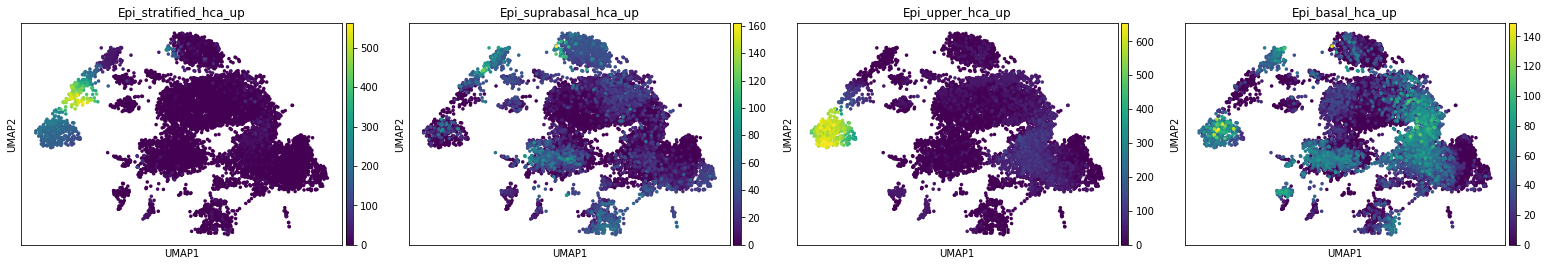

In [11]:
colorset= ['Epi_stratified_hca_up', 'Epi_suprabasal_hca_up', 'Epi_upper_hca_up', 'Epi_basal_hca_up']
sc.pl.umap(qsub, color=colorset, wspace=0.1, size=50)

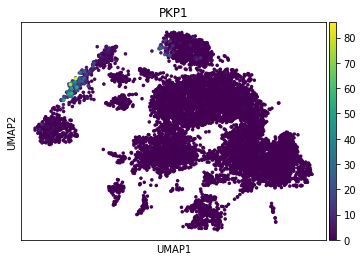

In [12]:
sc.pl.umap(qsub, color='PKP1', wspace=0.1, size=50)